# 3 - Feature Improvement

## Introduction:

For this project, the aim would be to explore the dataset, apply techniques to clean and augment the data samples where it is needed and predict the final class variable (0 or 1) where if the patient develops diabetes or not. The cleaning process involves altering columns and rows of the dataset, whereas augmenting would to remove the columns and adding columns to the dataset.

## Breakdown of this Project:
- Identify missing values within the dataset.
- Removal of any harmful data points/samples.
- Imputing missing values in the dataset. 
- Nomarlising or Standardising the dataset. 
- Constructing new features in the dataset. 
- Selecting or Removing features both manually and automatically. 
- Utilising matrix computations to transform datasets into different dimensions. 

## Datasets:

This dataset is called Pima Indian Diabetes Prediction and was obtained from the UCI Machine Learning Repository. It can be found in the link below or within this repository.

This dataset consists of 9 columns with 768 rows of data. The usage of this dataset was intended to be used for predicting the onset of diabetes in patients within the next five years to come for females. The females here are from the Pima Indian Heritage where they are of age 21 and over. 

### Preview of the columns in this dataset:

1. Number of times pregnant.
2. Plasma Glucose Concentration (2 hrs in an oral glucose tolerance test).
3. Diatolic Blood Pressure (mm Hg)
4. Triceps skinfold thickness (mm)
5. 2-Hr serum insuli measurement (mu U/ml)
6. Body mass index ( weight in kg/height in $m^{2}$ )
7. Diabetes pedigree funcntion.
8. Age (yrs)
9. Class Variable (0 or 1) - used for prediction.

Dataset Source: https://archive.ics.uci.edu/ml/datasets/pima+indians+diabetes

## Requirements:

- Pandas
- Numpy
- Matplotlib
- Seaborn


## 1 - Import the Required Libraries:

In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns  
import os
%matplotlib inline  

# Apply the visualisation theme:
plt.style.use('fivethirtyeight') 

## 2 - Load in the Dataset:

In [2]:
# Set up pathway to folder:
current_directory = os.getcwd()

dataset_path = os.path.dirname(os.path.realpath(current_directory + '/Dataset/'))
dataset_path = dataset_path + '/Dataset/'
# print(dataset_path)

In [3]:
# Dataset:
pima_diabetes_dat = pd.read_csv(dataset_path + 'pima.data')

### 2.1 - Checkout the Pima Dataset:

In [4]:
pima_diabetes_dat.head()

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


Seems like the column names are missing. To fix this, the column names will be included manually as follows:

In [5]:
# Specify the Column Names:
col_names = ['times_pregnant', 'plasma_glucose_concentration', 'diastolic_blood_pressure', 
             'triceps_thickness', 'serum_insulin', 'bmi', 'pedigree_function', 'age', 
             'onset_diabetes']

# Include the Column Names into the dataset:
pima_diabetes_dat = pd.read_csv(dataset_path + 'pima.data', names = col_names)

# Checkout the dataset:
pima_diabetes_dat.head()

,times_pregnant,plasma_glucose_concentration,diastolic_blood_pressure,triceps_thickness,serum_insulin,bmi,pedigree_function,age,onset_diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
pima_diabetes_dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   times_pregnant                768 non-null    int64  
 1   plasma_glucose_concentration  768 non-null    int64  
 2   diastolic_blood_pressure      768 non-null    int64  
 3   triceps_thickness             768 non-null    int64  
 4   serum_insulin                 768 non-null    int64  
 5   bmi                           768 non-null    float64
 6   pedigree_function             768 non-null    float64
 7   age                           768 non-null    int64  
 8   onset_diabetes                768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## 3 - EDA: Exploratory Data Analysis.

This section will go through showing some basic statistics, selection and visualisations of the dataset.

### 3.1 - Basic Statistics:

Taking a look into the 'onser_diabetes' column to determine how many people did or did not develop diabetes.

In [7]:
# Onset Diabetes patients:
pima_diabetes_dat['onset_diabetes'].value_counts(normalize = True)

0    0.651042
1    0.348958
Name: onset_diabetes, dtype: float64

From the above counts, it can be seen that ~35% of the population did get diabetes while ~65% of the people did not. Note that the goal here, as mentioned above in the introduction, is to predict the onset of diabetes based on the patterns within the data. The next stage would be visualise any differences between the patients that did and did not develop diabetes.

### 3.2 - Descriptive Statistics:

This will provide basic statistics such as the mean, standard deviation and percentile intervals for the data.

In [8]:
pima_diabetes_dat.describe()

,times_pregnant,plasma_glucose_concentration,diastolic_blood_pressure,triceps_thickness,serum_insulin,bmi,pedigree_function,age,onset_diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### 3.3 - Visualisations: Historgram 

Taking a look to see how 'plasma_glucose_concentration' affects 'onset_diabetes'. Check to see if there is a pattern in the values between the classes of prediction, in terms of plasma_glucose_concentration.

Current Plot is for bmi vs Onset Diabetes


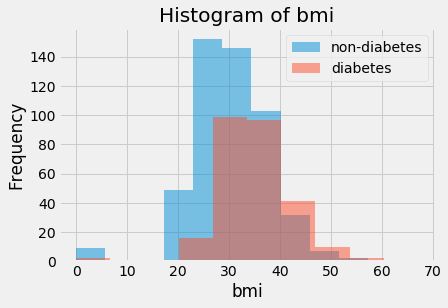

	
Current Plot is for diastolic_blood_pressure vs Onset Diabetes


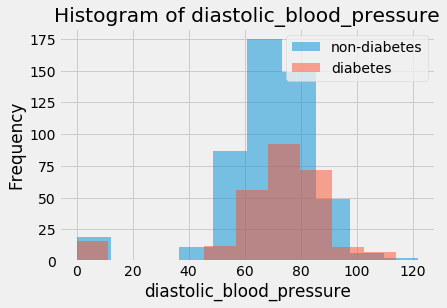

	
Current Plot is for plasma_glucose_concentration vs Onset Diabetes


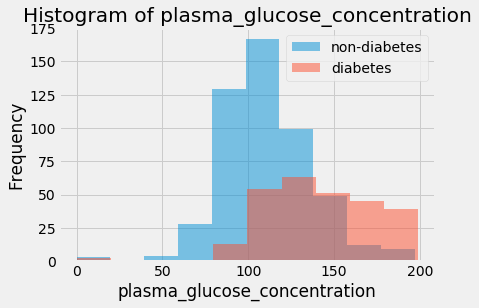

In [9]:
# Get the columns of interest:
col_list = ['bmi', 'diastolic_blood_pressure', 'plasma_glucose_concentration']

# Onset_diabetes pandas conditions:
onset_yes = pima_diabetes_dat['onset_diabetes'] == 1
onset_no = pima_diabetes_dat['onset_diabetes'] == 0

# Plot the Histograms:
for col in col_list:
    print('Current Plot is for {} vs Onset Diabetes'.format(col))

    plt.hist( pima_diabetes_dat[onset_no][col], bins = 10, alpha = 0.5, label = 'non-diabetes')

    plt.hist( pima_diabetes_dat[onset_yes][col], bins = 10, alpha = 0.5, label = 'diabetes')

    plt.legend(loc = 'upper right')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title('Histogram of {}'.format(col))
    plt.show()
    
    print('\t')



### Observations:

From the above histograms, it is obvious that there are big differences between the distributions. For example, taking the plasma_glucose_concentration, the patients that have developed diabetes have a concentration mean of around 130 to 140, while those that don't have a concentration mean of around 110. Similarly for BMI of the patients, those who have developed diabetes have a greater BMI count at around 35, while those that don't have diabetes are around 25. As for diastolic blood pressure, the distributions are similar where the distribution mean are almost the same, where the mean is around 70. Overall, this indicates that plasma glucose concentration and BMI of the body have more significnce which will conribute to the developement of diabetes.

### 3.4 - Correlation: 

Taking a look at the correlation between the different columns of the dataset.

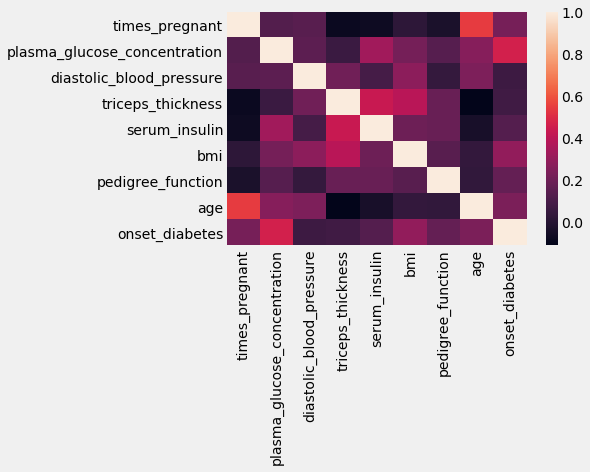

In [10]:
sns.heatmap(pima_diabetes_dat.corr())

### Observation:

As the hot spots in the correlation matrix is highlighted by the red colour, it can be seen that plasma_glucose_concentration does stand out as a major contributing factor to onset diabetes.

### Examine the numerical correlations for the Onset Diabetes Column:


In [11]:
pima_diabetes_dat.corr()['onset_diabetes']

times_pregnant                  0.221898
plasma_glucose_concentration    0.466581
diastolic_blood_pressure        0.065068
triceps_thickness               0.074752
serum_insulin                   0.130548
bmi                             0.292695
pedigree_function               0.173844
age                             0.238356
onset_diabetes                  1.000000
Name: onset_diabetes, dtype: float64

From the numbers above, the plasma_glucose_concentration = 0.466 making it the highest correlated factor. the second highest contributing factor is bmi = 0.292 while the third highest contributing factor is age = 0.238.

From these, it can be said that these three features are important factors towards the prediction of onset diabetes.

## 4 - Missing Values:

Check the dataset for any potential missing values, so that it can be dealt with.

In [12]:
pima_diabetes_dat.isnull().sum()

times_pregnant                  0
plasma_glucose_concentration    0
diastolic_blood_pressure        0
triceps_thickness               0
serum_insulin                   0
bmi                             0
pedigree_function               0
age                             0
onset_diabetes                  0
dtype: int64

Seems like there aren't any missing values.

## 5 - Deal with the Missing Values:

From the earlier basic statistics, it was found that under the BMI column, it has a minimum value of 0, and this is medically impossible. I could be bad encoding like a missing value rather than a "None" value or there are missing cells.


Taking another look at the table:

In [13]:
pima_diabetes_dat.describe()

,times_pregnant,plasma_glucose_concentration,diastolic_blood_pressure,triceps_thickness,serum_insulin,bmi,pedigree_function,age,onset_diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Further, there are other columns that presents with this issue. These columns were found to be:

In [14]:
col_names = list(pima_diabetes_dat.columns)

potential_missingValue_col = []

for col in col_names:
    if ( pima_diabetes_dat.describe()[col][3] == 0 ):
        potential_missingValue_col.append(pima_diabetes_dat.describe()[col].name)

print("Here are the potential columns with missing data for the 'min' row: \t")
potential_missingValue_col

Here are the potential columns with missing data for the 'min' row: 	


['times_pregnant',
 'plasma_glucose_concentration',
 'diastolic_blood_pressure',
 'triceps_thickness',
 'serum_insulin',
 'bmi',
 'onset_diabetes']

Note that the column 'times_pregnant' uses zero as a number to state the amount of times the patient have been pregnant and 'onset_diabetes' column is the class variable, these columns can be ignored. That leaves the remainder as the columns that have missing values. 

Missing values in these columns:
- 'plasma_glucose_concentration'
- 'diastolic_blood_pressure'
- 'triceps_thickness'
- 'serum_insulin'
- 'bmi'

## 5.1 - Dealing with the missing values:

For the sake of compatibility for applying the dataset to learning algorithms, the rows of missing values needs to be dealt with firstly. To do so, there are two methods:

1. Removing the rows with the missing value.
2. Imputing the missing data.

In [15]:
# Remove the unwanted columns from the list of potentials:
potential_missingValue_col.remove('times_pregnant')
potential_missingValue_col.remove('onset_diabetes')
potential_missingValue_col

['plasma_glucose_concentration',
 'diastolic_blood_pressure',
 'triceps_thickness',
 'serum_insulin',
 'bmi']

The first job here is to remove the zeros in the dataset and replace them with 'None'. This is so that the ".fillna" and ".dropna" methods can work properly.

In [16]:
# Loop through the zeros and change them to 'None':
for col in potential_missingValue_col:
    pima_diabetes_dat[col].replace([0], [None], inplace = True)

In [17]:
# Check out the results:
pima_diabetes_dat.isnull().sum()

times_pregnant                    0
plasma_glucose_concentration      5
diastolic_blood_pressure         35
triceps_thickness               227
serum_insulin                   374
bmi                              11
pedigree_function                 0
age                               0
onset_diabetes                    0
dtype: int64

In [18]:
pima_diabetes_dat.head()

,times_pregnant,plasma_glucose_concentration,diastolic_blood_pressure,triceps_thickness,serum_insulin,bmi,pedigree_function,age,onset_diabetes
0,6,148,72,35,None,33.6,0.627,50,1
1,1,85,66,29,None,26.6,0.351,31,0
2,8,183,64,None,None,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


From the output above, there are now 5 columns with missing values, where some of these have only 5 missing values (plasma_glucose_concentration) or 374 missing values (serum_insulin).

In [19]:
# EDA on dataset:
pima_diabetes_dat.describe()

,times_pregnant,pedigree_function,age,onset_diabetes
count,768.000000,768.000000,768.000000,768.000000
mean,3.845052,0.471876,33.240885,0.348958
std,3.369578,0.331329,11.760232,0.476951
min,0.000000,0.078000,21.000000,0.000000
25%,1.000000,0.243750,24.000000,0.000000
50%,3.000000,0.372500,29.000000,0.000000
75%,6.000000,0.626250,41.000000,1.000000
max,17.000000,2.420000,81.000000,1.000000


Note that the ".describe()" method does not include columns with missing values, hence this is not ideal and the computation of the mean and standard deviation will need to be down manually.

In [20]:
# Compute the mean and standard deviation for the missing columns:
for col in potential_missingValue_col:
    mean_val = pima_diabetes_dat[col].mean()
    std_val = pima_diabetes_dat[col].std()
    
    print('Column: {}'.format(col))
    print('mean = {:.2f} and standard deviation = {:.2f}.'.format(mean_val, std_val))
    print('\t')
    

Column: plasma_glucose_concentration
mean = 121.69 and standard deviation = 30.54.
	
Column: diastolic_blood_pressure
mean = 72.41 and standard deviation = 12.38.
	
Column: triceps_thickness
mean = 29.15 and standard deviation = 10.48.
	
Column: serum_insulin
mean = 155.55 and standard deviation = 118.78.
	
Column: bmi
mean = 32.46 and standard deviation = 6.92.
	


## 5.2 - Removing the Data Rows: 

One of the simplest ways to deal with missing data is to remove them completely.

In [21]:
# Drop the rows with missing values:
pima_diabetes_dat_dropped = pima_diabetes_dat.dropna()

Performing this kind of data removel also means that the dataset size (or number of samples) have been reduced. The following will show the difference.

In [22]:
nb_rows_lost = round( (pima_diabetes_dat.shape[0] - pima_diabetes_dat_dropped.shape[0]) / float(pima_diabetes_dat.shape[0]) * 100)

# Print:
print('Dataset retained {}% of rows compared to original dataset.'.format(nb_rows_lost))

Dataset retained 49% of rows compared to original dataset.


As it can be seen, just by doing this, the dataset has lost 51%. Considering it from the Machine Learning algorithm's perspective, it means that the algorithm wont have much data to learn from and this may impact its predictive power down the line.

### 5.2.1 - Comparing Statistics of Before/After:

Performing EDA to examine the difference.

In [23]:
# Check the Splits of the dataset (BEFORE):
pima_diabetes_dat['onset_diabetes'].value_counts(normalize = True)

0    0.651042
1    0.348958
Name: onset_diabetes, dtype: float64

In [24]:
# Check the Splits of the dataset (AFTER):
pima_diabetes_dat_dropped['onset_diabetes'].value_counts(normalize = True)

0    0.668367
1    0.331633
Name: onset_diabetes, dtype: float64

Seems like the splits remains roughly similar during the transformation. Now lets compare the __mean__:

In [25]:
pima_diabetes_dat.mean()

times_pregnant                    3.845052
plasma_glucose_concentration    121.686763
diastolic_blood_pressure         72.405184
triceps_thickness                29.153420
serum_insulin                   155.548223
bmi                              32.457464
pedigree_function                 0.471876
age                              33.240885
onset_diabetes                    0.348958
dtype: float64

In [26]:
pima_diabetes_dat_dropped.mean()

times_pregnant                    3.301020
plasma_glucose_concentration    122.627551
diastolic_blood_pressure         70.663265
triceps_thickness                29.145408
serum_insulin                   156.056122
bmi                              33.086224
pedigree_function                 0.523046
age                              30.864796
onset_diabetes                    0.331633
dtype: float64

Slightly hard to read and compare each columns. Visualise them for better understanding.

Text(0, 0.5, '% Change.')

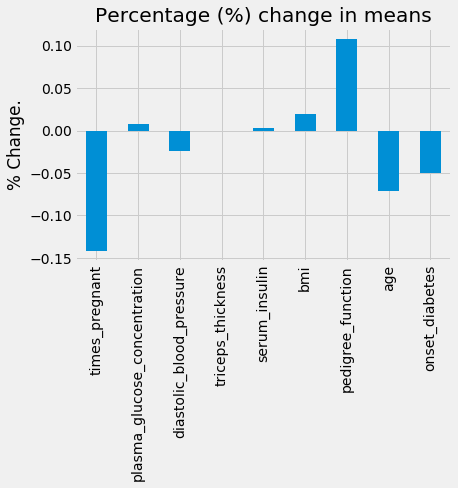

In [33]:
# Find the Percentage (%) change in means:
percent_chg_mean = (pima_diabetes_dat_dropped.mean() - pima_diabetes_dat.mean()) / pima_diabetes_dat.mean()

# Visualise:
ax = percent_chg_mean.plot(kind = 'bar', title = 'Percentage (%) change in means')
ax.set_ylabel('% Change.')

### Observation:

From the chart above, it can be seen that the greatest change to the dataset were with "times_pregnant" (at -14%) and "" (at +11%). Ideally, retain as much data as possible is the desired outcome, where it should help the machine learning (ML) model predict better.

### 5.2.2 - Modelling with KNN Classifier:

Taking the dataset above and put it through the KNN model.

In [28]:
# Import the required libraries:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [29]:
# Divide the Dataset into its X and Y components:
X_dropped = pima_diabetes_dat_dropped.drop('onset_diabetes', axis = 1)
y_dropped = pima_diabetes_dat_dropped['onset_diabetes']

In [32]:
# Check how many rows the model will be learning from:
print("Model will learn from {} rows.".format(X_dropped.shape[0]))

Model will learn from 392 rows.


In [30]:
# Define the Grid Search variables and instances: parameters for KNN to try.
knn_params = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7]}

# Instantiate the KNN model:
knn_model = KNeighborsClassifier()


In [31]:
# Apply the model onto the dataset:
grid = GridSearchCV(estimator = knn_model,
                    param_grid = knn_params)

grid.fit(X_dropped, y_dropped)

# Show the Results:
print(grid.best_score_, grid.best_params_)

0.7348263550795197 {'n_neighbors': 7}


### Observation:
It seems like the KNN model from grid search determined that using 7 nearest neighbours achieved the best accuracy score of 73.4%. Note that this was achieve by learning from 49% of the original dataset.

## 6 - Imputing Missing Data:

Imputing missing data can be said to be filling in missing data values with numerical quantities from existing knowledge or data. There are a few methods, where the two most common methods are:

1) Imputing by using the average (MEAN) value of the column.
2) Imputing by using the Median value of the column.

## 6.1 - Imputing by using the average (MEAN) value of the column:

In [34]:
# Check out the missing values of the columns:
pima_diabetes_dat.isnull().sum()

times_pregnant                    0
plasma_glucose_concentration      5
diastolic_blood_pressure         35
triceps_thickness               227
serum_insulin                   374
bmi                              11
pedigree_function                 0
age                               0
onset_diabetes                    0
dtype: int64

Focusing on the "plasma_glucose_concentration" column, identify the 5 missing rows.

In [40]:
# Grab the index of the missing rows:
condition = pima_diabetes_dat['plasma_glucose_concentration'].isnull()

emptyRow_plasma_index = pima_diabetes_dat[condition].index

# Extract the rows:
pima_diabetes_dat.loc[emptyRow_plasma_index]['plasma_glucose_concentration']


75     None
182    None
342    None
349    None
502    None
Name: plasma_glucose_concentration, dtype: object

Next, is to replace these "None" values with the mean.

In [41]:
# Compute the mean of the column:
mean_plasma = pima_diabetes_dat['plasma_glucose_concentration'].mean()

# Replace the "None" values:
pima_diabetes_dat['plasma_glucose_concentration'].fillna(value=mean_plasma,
                                                         inplace=True)

In [42]:
# Check out the dataset:
pima_diabetes_dat.isnull().sum()


times_pregnant                    0
plasma_glucose_concentration      0
diastolic_blood_pressure         35
triceps_thickness               227
serum_insulin                   374
bmi                              11
pedigree_function                 0
age                               0
onset_diabetes                    0
dtype: int64

Done, the number of missing values (5, before) are filled in with the mean value.

In [43]:
# Check out the mean value:
pima_diabetes_dat.loc[emptyRow_plasma_index]['plasma_glucose_concentration']

75     121.686763
182    121.686763
342    121.686763
349    121.686763
502    121.686763
Name: plasma_glucose_concentration, dtype: float64

### 6.1.1 - Impute the Dataset with "Imputer" from SKLEARN:

The above method is the manual way of impute each column with the mean value. Luckily, there is a handy package provided by scikit-learn to speed things up.

The SimpleImputer consists of a few parameters, where the focus here is "strategy". This will be set to compute for the "mean".

In [47]:
# Import the required package:
from sklearn.impute import SimpleImputer

In [48]:
# Instantiate the Imputer:
imputer = SimpleImputer(strategy='mean')

In [49]:
# Apply the imputer to the dataset:
pima_imputed = imputer.fit_transform(pima_diabetes_dat)

# Check out the type of the output:
type(pima_imputed)

numpy.ndarray

In [50]:
# Transform the Array to DataFrame:
pima_imputed = pd.DataFrame(data = pima_imputed, 
                            columns = col_names)

# Check out the Dataset:
pima_imputed.head()

,times_pregnant,plasma_glucose_concentration,diastolic_blood_pressure,triceps_thickness,serum_insulin,bmi,pedigree_function,age,onset_diabetes
0,6.0,148.0,72.0,35.00000,155.548223,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.00000,155.548223,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,29.15342,155.548223,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.00000,94.000000,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.00000,168.000000,43.1,2.288,33.0,1.0


In [51]:
# Check the Plasma Glucose Concentration Column:
pima_diabetes_dat.loc[emptyRow_plasma_index]['plasma_glucose_concentration']

75     121.686763
182    121.686763
342    121.686763
349    121.686763
502    121.686763
Name: plasma_glucose_concentration, dtype: float64

In [53]:
# Perform a final check for missing values:
pima_imputed.isnull().sum()

times_pregnant                  0
plasma_glucose_concentration    0
diastolic_blood_pressure        0
triceps_thickness               0
serum_insulin                   0
bmi                             0
pedigree_function               0
age                             0
onset_diabetes                  0
dtype: int64

The dataset now has no more missing values, as they are all filled in with the mean of each column.

### 6.1.2 - Imputing with different values:

In [54]:
# Impute with Zeros:
pima_zero = pima_diabetes_dat.fillna(value = 0)

### 6.1.3 - Test the Accuracy based on Imputing with Zeros:

In [55]:
# Divide the Dataset into its X and Y components:
X_zero = pima_zero.drop('onset_diabetes', axis = 1)
y_zero = pima_zero['onset_diabetes']

In [56]:
# Check how many rows the model will be learning from:
print("Model will learn from {} rows.".format(X_zero.shape[0]))

Model will learn from 768 rows.


In [57]:
# Define the Grid Search variables and instances: parameters for KNN to try.
knn_params = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7]}

# Instantiate the KNN model:
knn_model = KNeighborsClassifier()


In [58]:
# Apply the model onto the dataset:
grid = GridSearchCV(estimator = knn_model,
                    param_grid = knn_params)

grid.fit(X_zero, y_zero)

# Show the Results:
print(grid.best_score_, grid.best_params_)

0.7409387997623291 {'n_neighbors': 7}


### Observation:

It can be seen that the model above that utilises a dataset with imputed zero values was able to achieve an accuracy of 74.1% and uses nearest neighbours of 7.

### 6.1.4 - Test the Accuracy based on Imputing with Mean:

In [59]:
# Divide the Dataset into its X and Y components:
X_mean = pima_imputed.drop('onset_diabetes', axis = 1)
y_mean = pima_imputed['onset_diabetes']

In [60]:
# Check how many rows the model will be learning from:
print("Model will learn from {} rows.".format(X_zero.shape[0]))

Model will learn from 768 rows.


In [61]:
# Define the Grid Search variables and instances: parameters for KNN to try.
knn_params = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7]}

# Instantiate the KNN model:
knn_model = KNeighborsClassifier()


In [62]:
# Apply the model onto the dataset:
grid = GridSearchCV(estimator = knn_model,
                    param_grid = knn_params)

grid.fit(X_mean, y_mean)

# Show the Results:
print(grid.best_score_, grid.best_params_)

0.7292335115864528 {'n_neighbors': 7}


### Observation:

It can be seen that the model above that utilises a dataset with imputed mean values was able to achieve an accuracy of 72.9% and uses nearest neighbours of 7.

### Overall Comparison:

Seems like the dataset that was imputed with the mean of each column outperformed the other models by a few percentage. The best achived score was 74.1%.

## 7 - ML Pipeline with Imputed Values:

